In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import seaborn as sns
import matplotlib.pyplot as plt

#Import Walmart CSV Dataset 
data = pd.read_csv("/kaggle/input/walmart-dataset/Walmart.csv")

# **Data Collection and Exploration**

In [2]:
data.Date = pd.to_datetime(data.Date,format = "%d-%m-%Y")

data['Weekday'] = data.Date.dt.weekday
data['Month'] = data.Date.dt.month
data['Year'] = data.Date.dt.year

data.drop(['Date'], axis = 1, inplace=True)

#Displaying column info for dataset ...
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   Weekday       6435 non-null   int32  
 8   Month         6435 non-null   int32  
 9   Year          6435 non-null   int32  
dtypes: float64(5), int32(3), int64(2)
memory usage: 427.4 KB


<Axes: >

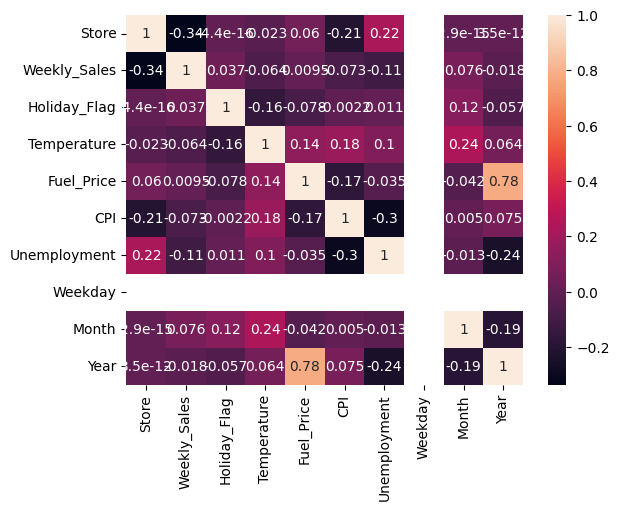

In [3]:
#Creating heatmap for dataset ...
corr_chart = data.corr()
sns.heatmap(corr_chart, annot = True)

# **Data Preprocessing**

In [4]:
#Checking for missing values in dataset ...
data.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Weekday         0
Month           0
Year            0
dtype: int64

# **Model Training**

In [5]:
#Importing all library necessary for model training
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

X = data.drop(['Weekly_Sales'], axis = 1)
y = data['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Creating a Decision Tree Regressor
tree_regressor = DecisionTreeRegressor(max_depth = 3, max_leaf_nodes = 9, random_state = 42)
tree_regressor.fit(X_train, y_train)
y_pred_regressor = tree_regressor.predict(X_test)

In [6]:
#Calculating the evaluation metrics of the decision tree

MAE = mean_absolute_error(y_test, y_pred_regressor)
MSE = mean_squared_error(y_test, y_pred_regressor)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred_regressor)

print(f"Mean Absolute Error: {MAE}")
print(f"Mean Squared Error: {MSE}")
print(f"Root Mean Squared Error: {RMSE}")
print(f"\nR2 Score: {R2}")

Mean Absolute Error: 320641.41430814005
Mean Squared Error: 171070370894.044
Root Mean Squared Error: 413606.54116447916

R2 Score: 0.46898045325373927


# **Building the Decision Tree**

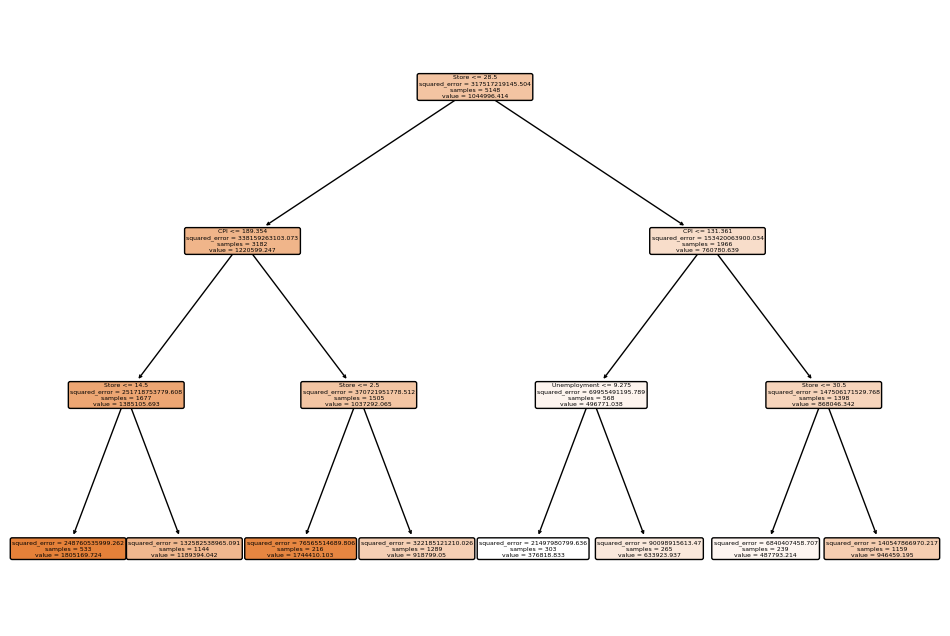

In [7]:
from sklearn.tree import plot_tree

#Visualising the Decision Tree
plt.figure(figsize = (12, 8))
plot_tree(tree_regressor, filled = True, feature_names = X.columns, rounded = True)
plt.show()

# **Hyperparameter Tuning**

In [8]:
#code code code